In [133]:
import numpy as np 
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport

import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier


from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [5]:
url="https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv"

In [33]:
df=pd.read_csv(url,sep=",")
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0             0.0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1             1.0  20-12-2015          1.35      54876.98   674.28   44638.81   
2             2.0  13-12-2015          0.93     118220.22   794.70  109149.67   
3             3.0  06-12-2015          1.08      78992.15  1132.00   71976.41   
4             4.0  29-11-2015          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
16463         NaN         NaN           NaN           NaN      NaN        NaN   
16464         NaN         NaN           NaN           NaN      NaN        NaN   
16465         NaN         NaN           NaN           NaN      NaN        NaN   
16466         NaN         NaN           NaN           NaN      NaN        NaN   
16467         NaN         NaN           NaN           NaN      NaN        NaN   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
16463     NaN         NaN         NaN         NaN          NaN           NaN   
16464     NaN         NaN         NaN         NaN          NaN           NaN   
16465     NaN         NaN         NaN         NaN          NaN           NaN   
16466     NaN         NaN         NaN         NaN          NaN           NaN   
16467     NaN         NaN         NaN         NaN          NaN           NaN   

         year  region  
0      2015.0  Albany  
1      2015.0  Albany  
2      2015.0  Albany  
3      2015.0  Albany  
4      2015.0  Albany  
...       ...     ...  
16463     NaN     NaN  
16464     NaN     NaN  
16465     NaN     NaN  
16466     NaN     NaN  
16467     NaN     NaN  

[16468 rows x 14 columns]

In [34]:
df.dropna(axis=0,inplace=True)

In [35]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 165.9+ KB


In [37]:
#Changing Data types 
df["Date"]= pd.to_datetime(df["Date"])

In [38]:
print('\n'"Total No of Regions that the Avacado is brought from:",len(df['region'].unique()),end='\n\n')
print(df['region'].unique())



Total No of Regions that the Avacado is brought from: 51

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'Columbus'
 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewYork' 'Northeast' 'NorthernNewEngland'
 'Orlando' 'Philadelphia' 'PhoenixTucson' 'Pittsburgh' 'Plains' 'Portland'
 'RaleighGreensboro' 'RichmondNorfolk' 'Roanoke' 'SanDiego' 'SanFrancisco'
 'Seattle' 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis'
 'Syracuse' 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


In [39]:
print(df['type'].unique())
#"Type" Column Can be dropped as it has only one value i.e.,Conventional

['conventional']


In [40]:
df.drop("type",axis=1,inplace=True)

In [42]:
#To better understand the data we should change the region data using label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[["region"]] = df[["region"]].apply(le.fit_transform)
df

Date  AveragePrice  Total Volume      4046       4225      4770  \
0    2015-12-27          1.33      64236.62   1036.74   54454.85     48.16   
1    2015-12-20          1.35      54876.98    674.28   44638.81     58.33   
2    2015-12-13          0.93     118220.22    794.70  109149.67    130.50   
3    2015-06-12          1.08      78992.15   1132.00   71976.41     72.58   
4    2015-11-29          1.28      51039.60    941.48   43838.39     75.78   
...         ...           ...           ...       ...        ...       ...   
1512 2016-10-16          1.39     190846.01  57529.11   56366.66  17531.78   
1513 2016-09-10          1.51     178235.75  43325.87   52189.61  19419.57   
1514 2016-02-10          1.48     178410.82  46364.75   52893.38  16736.92   
1515 2016-09-25          1.47     189131.52  54110.79   53593.58  17495.42   
1516 2016-09-18          1.43     182978.30  43116.41   54193.42  16563.91   

      Total Bags  Small Bags  Large Bags  XLarge Bags    year  region  
0        8696.87     8603.62       93.25         0.00  2015.0       0  
1        9505.56     9408.07       97.49         0.00  2015.0       0  
2        8145.35     8042.21      103.14         0.00  2015.0       0  
3        5811.16     5677.40      133.76         0.00  2015.0       0  
4        6183.95     5986.26      197.69         0.00  2015.0       0  
...          ...         ...         ...          ...     ...     ...  
1512    59418.46    48823.53    10354.65       240.28  2016.0       7  
1513    63300.70    54704.14     8596.56         0.00  2016.0       7  
1514    62415.77    53332.61     8258.16       825.00  2016.0       7  
1515    63931.73    55653.47     8278.26         0.00  2016.0       7  
1516    69104.56    57456.21    11648.35         0.00  2016.0       7  

[1517 rows x 12 columns]

In [43]:
profile=ProfileReport(df,title="Avacado Data", explorative=True)
profile

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

This Data is Recoreded from 2015-01-02 - 2016-12-25

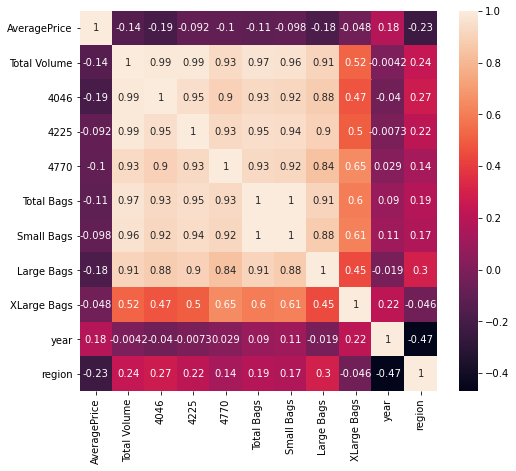

In [44]:
corr_hmap= df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

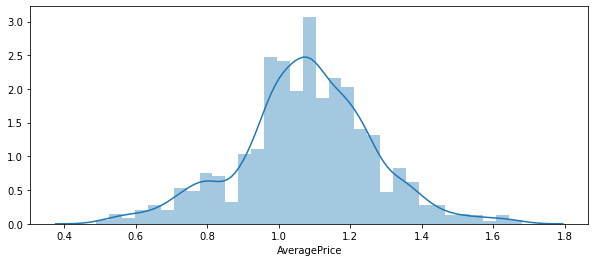

In [48]:
plt.subplots(figsize=(10, 4))
sns.distplot(df.AveragePrice)
plt.show()

In [49]:
print("Skewness: %f" % df['AveragePrice'].skew())

Skewness: -0.109444


In [50]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count   1517.000000  1.517000e+03  1.517000e+03  1.517000e+03  1.517000e+03   
mean       1.074990  1.601879e+06  6.464387e+05  6.114375e+05  5.040550e+04   
std        0.188891  4.433143e+06  1.947614e+06  1.672906e+06  1.377812e+05   
min        0.490000  3.875074e+04  4.677200e+02  1.783770e+03  0.000000e+00   
25%        0.980000  1.474700e+05  2.040034e+04  4.147606e+04  9.112500e+02   
50%        1.080000  4.027919e+05  8.175117e+04  1.186649e+05  7.688170e+03   
75%        1.190000  9.819751e+05  3.775785e+05  4.851503e+05  2.916730e+04   
max        1.680000  4.465546e+07  1.893304e+07  1.895648e+07  1.381516e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags         year  \
count  1.517000e+03  1.517000e+03  1.517000e+03    1517.000000  1517.000000   
mean   2.935974e+05  2.487736e+05  4.264205e+04    2181.771074  2015.162821   
std    7.579765e+05  6.474765e+05  1.182157e+05    7455.712144     0.369324   
min    3.311770e+03  3.311770e+03  0.000000e+00       0.000000  2015.000000   
25%    3.620689e+04  2.972722e+04  5.407400e+02       0.000000  2015.000000   
50%    7.397906e+04  6.237569e+04  5.044350e+03       0.000000  2015.000000   
75%    1.576097e+05  1.461994e+05  2.926767e+04     401.480000  2015.000000   
max    6.736304e+06  5.893642e+06  1.121076e+06  108072.790000  2016.000000   

            region  
count  1517.000000  
mean     21.196440  
std      16.132398  
min       0.000000  
25%       6.000000  
50%      19.000000  
75%      35.000000  
max      50.000000

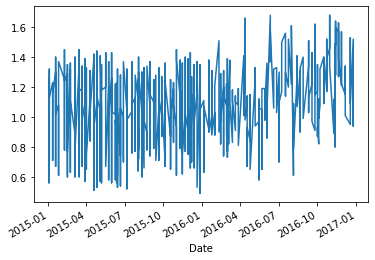

In [53]:
df.set_index("Date",inplace=True)
df["AveragePrice"].plot()

Average price has increased from \\$1.4 to \\$1.6 from April of 2016(2016-04)

In [58]:
y=df["AveragePrice"]
x=df.drop("AveragePrice", axis=1)
num_folds = 10
seed = 409
scoring = 'neg_mean_squared_error'

In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
lr=LinearRegression()
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [57]:
max_scr=0
for i in range(30,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i,"The model Perfomes very well")
        print("Training r2_score is:",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:",r2_score(y_test,pred_test)*100)

At random state 409 The model Perfomes very well
Training r2_score is: 17.085771052288557
Testing r2_score is: 17.08927328376174


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=409)

In [69]:
models= [
    ("Lasso",Lasso()),
    ("Linear Regression",LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Ridge Regression",Ridge()),
    ("KNearest Neighbors",KNeighborsRegressor(1)),
    ("SVR",SVR()),
    ("RandomForestRegressor",RandomForestRegressor())
    ]

In [76]:
results = []
names = []
for name, model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    R2 = r2_score(y_test,y_pred)
    results.append(R2)
    names.append(name)
    msg = "R2 Score with ""%s: %f " % (name, R2)
    print(msg)


R2 Score with Lasso: -0.003839 
R2 Score with Linear Regression: 0.170893 
R2 Score with Decision Tree: 0.647502 
R2 Score with Ridge Regression: 0.170594 
R2 Score with KNearest Neighbors: 0.807729 
R2 Score with SVR: 0.456311 
R2 Score with RandomForestRegressor: 0.810173 


We can observe a significant jump in the score when we used KNearest Neighbors and RandomForestRegressor with 80%+ Accuracy 

In [77]:
#we Can go ahead with hyper parameter tuning for both KNN and RandomForest

In [83]:

# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = KNeighborsRegressor()
n_neighbors = range(1, 13, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

clf=GridSearchCV(model,grid)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [111]:
KNN= KNeighborsRegressor(metric= 'manhattan', n_neighbors= 3, weights= 'distance')
KNN.fit(x_train,y_train)
KNN.score(x_train,y_train)
y_pred = KNN.predict(x_test)

KNNs = r2_score(y_test,y_pred)
print("r2 score is :",KNNs*100)

KNNscore=cross_val_score(KNN,x_t,y,cv=3)
KNNc=KNNscore.mean()
print("Cross value Score:",KNNc)

r2 score is : 87.53430685088033
Cross value Score: -0.07271129862434889


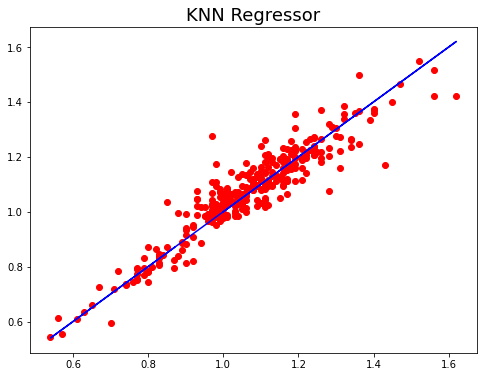

In [88]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("KNN Regressor",fontsize=18)
plt.show()

In [ ]:
model=RandomForestRegressor()

n_estimators= [10,20,30]
max_features= [5, 10], 
max_depth= [10,20,50, None] 
bootstrap = [True, False]
criterion= ["mse", "mae"]
    
grid = dict(n_estimators=n_estimators,max_depth=max_depth, criterion=criterion)  

clf=GridSearchCV(model,grid)
clf.fit(x_train,y_train)
print(clf.best_params_)

In [110]:
rf = RandomForestRegressor(n_estimators=25)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
y_predrf = rf.predict(x_test)

rfs = r2_score(y_test,y_predrf)
print("r2 score is :",rfs*100)

rfscore=cross_val_score(rf,x_t,y,cv=3)
rfc=rfscore.mean()
print("Cross value Score:",rfc)

r2 score is : 81.06491556307662
Cross value Score: 0.20501347921448318


Randon forest was not able to improve the score so we are going ahead with KNN

In [115]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
#score variables
rf_MAE = round(MAE(y_test, y_pred),2)
rf_MSE = round(MSE(y_test, y_pred),2)
rf_R_2 = round(r2_score(y_test, y_pred),4)
rf_CS  = round(cross_val_score(rf,x_t,y,cv=3).mean(),4)

print(f"KNN Mean Absolute Error: {rf_MAE}\n")
print(f"KNN Mean Squared Error: {rf_MSE}\n")
print(f"KNN R^2 Score: {rf_R_2}\n")
print(f"KNN Cross val Score: {rf_CS}\n")

KNN Mean Absolute Error: 0.04

KNN Mean Squared Error: 0.0

KNN R^2 Score: 0.8753

KNN Cross val Score: 0.2489



In [113]:
rf_MAE = round(MAE(y_test, y_predrf),2)
rf_MSE = round(MSE(y_test, y_predrf),2)
rf_R_2 = round(r2_score(y_test,y_predrf),4)
rf_CS  = round(cross_val_score(rf,x_t,y,cv=3).mean(),4)

print(f"RFR Mean Absolute Error: {rf_MAE}\n")
print(f"RFR Mean Squared Error: {rf_MSE}\n")
print(f"RFR R^2 Score: {rf_R_2}\n")
print(f"RFR Cross val Score: {rf_CS}\n")

RFR Mean Absolute Error: 0.05

RFR Mean Squared Error: 0.01

RFR R^2 Score: 0.8106

RFR Cross val Score: 0.1955



In [114]:
from sklearn.ensemble import AdaBoostRegressor
#Creating AdaBoost Regressor 
ad=AdaBoostRegressor(n_estimators=50,base_estimator=KNN)
ad.fit(x_train,y_train)

ad_pred= ad.predict(x_test)
ABs = r2_score(y_test,ad_pred)
print("r2 score is :",ADs*100)

ABscore=cross_val_score(ad,x_t,y,cv=3)
ABc=ADscore.mean()
print("Cross value Score:",ABc)

r2 score is : 88.39109052108836
Cross value Score: -0.09421202456055837


In [116]:
Ad_MAE = round(MAE(y_test, ad_pred),2)
Ad_MSE = round(MSE(y_test, ad_pred),2)
Ad_R_2 = round(r2_score(y_test, ad_pred),4)
Ad_CS  = round(cross_val_score(ad,x_t,y,cv=3).mean(),4)

print(f"AB Mean Absolute Error: {Ad_MAE}\n")
print(f"AB Mean Squared Error: {Ad_MSE}\n")
print(f"AB R^2 Score: {Ad_R_2}\n")
print(f"AB val Score: {Ad_CS}\n")

AB Mean Absolute Error: 0.04

AB Mean Squared Error: 0.0

AB R^2 Score: 0.8839

AB val Score: -0.0954



In [119]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=ad_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("AdaBoost Regressor",fontsize=18)
plt.show()

In [117]:
KNN= KNeighborsRegressor(metric= 'manhattan', n_neighbors= 3, weights= 'distance')
model= AdaBoostRegressor(n_estimators=50,base_estimator=KNN)
model.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=KNeighborsRegressor(metric='manhattan',
                                                     n_neighbors=3,
                                                     weights='distance'))

In [118]:
import joblib
joblib.dump(model,"AvacadoPrice.pkl")

['AvacadoPrice.pkl']

 we have prepered the Model for price prediction we can now build the Region Classifier Model 

In [122]:
y_r=df["region"]
x_r=df.drop("region", axis=1)

In [127]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x_r)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
lr=LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [129]:
max_scr=0
for i in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y_r,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)>=round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i,"The model Perfomes very well")
        print("Training accuracy_score is:",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:",accuracy_score(y_test,pred_test), end = "\n\n\n")

At random state 30 The model Perfomes very well
Training accuracy_score is: 48.80461665292663
Testing accuracy_score is: 0.4769736842105263


At random state 31 The model Perfomes very well
Training accuracy_score is: 49.71145919208574
Testing accuracy_score is: 0.4473684210526316


At random state 34 The model Perfomes very well
Training accuracy_score is: 51.03050288540808
Testing accuracy_score is: 0.4375


At random state 35 The model Perfomes very well
Training accuracy_score is: 47.81533388293487
Testing accuracy_score is: 0.48355263157894735


At random state 36 The model Perfomes very well
Training accuracy_score is: 50.5358615004122
Testing accuracy_score is: 0.42105263157894735


At random state 38 The model Perfomes very well
Training accuracy_score is: 50.78318219291014
Testing accuracy_score is: 0.45394736842105265


At random state 39 The model Perfomes very well
Training accuracy_score is: 49.95877988458368
Testing accuracy_score is: 0.45394736842105265


At random state

At random state 97 The model Perfomes very well
Training accuracy_score is: 51.195383347073374
Testing accuracy_score is: 0.48026315789473684

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y_r,test_size=.20,random_state=97)  
num_folds = 10
seed = 97
scoring = 'accuracy'

In [136]:
models= [
    ("SVC",SVC()),
    ("Logistic Regression",LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Naive Bayes",GaussianNB()),
    ("KNearest Neighbors",KNeighborsClassifier(3)),
    ("RandomForestClassifier",RandomForestClassifier())
    ]

In [137]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


SVC: 0.385788 (0.038490)
Logistic Regression: 0.469923 (0.027311)
Decision Tree: 0.868107 (0.023567)
Naive Bayes: 0.823560 (0.035663)
KNearest Neighbors: 0.694005 (0.042024)
RandomForestClassifier: 0.962891 (0.017454)


RandomForestClassifier: 0.962891 (0.017454)
#we have achived a accuracy score of 96% so we can go ahead with the following model for hyper parameter tuning 

In [139]:
#define models and parameters
n_estimators = [10, 100]
max_features = ['sqrt', 'log2']
param_grid = dict(n_estimators=n_estimators,max_features=max_features)
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)

In [140]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.964524 using {'max_features': 'sqrt', 'n_estimators': 100}
#4 0.936506 (0.012887) with: {'max_features': 'sqrt', 'n_estimators': 10}
#1 0.964524 (0.018893) with: {'max_features': 'sqrt', 'n_estimators': 100}
#3 0.944743 (0.024783) with: {'max_features': 'log2', 'n_estimators': 10}
#2 0.964517 (0.022523) with: {'max_features': 'log2', 'n_estimators': 100}


Model has been perfoming Best: 0.964524 using {'max_features': 'sqrt', 'n_estimators': 100}

In [141]:
model = RandomForestClassifier(max_features= 'sqrt', n_estimators=100)
model.fit(x_train, y_train)

RandomForestClassifier(max_features='sqrt')

In [142]:
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions)) 
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9703947368421053
[[13  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  5]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        18
           4       1.00      0.89      0.94         9
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        13
           7       0.80      1.00      0.89         4
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         5
          14  

Model has achived a Accuracy Score of 97%

In [143]:
import joblib
joblib.dump(model,"Avacadoregion.pkl")

['Avacadoregion.pkl']